# Proyek Analisis Data: E-commerce Public Dataset





*   Nama: Hannah Patricia
*   Email: hannahptrcia@gmail.com
*   ID Dicoding: hannahptrcia




# Menentukan Pertanyaan Bisnis
1.  Kategori produk apa saja yang paling sering dibeli dan paling jarang dibeli?
2. Customer dari kota mana yang paling sering berbelanja disini?
3. Bagaimana grafik penjualan tiap bulannya?

Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency

# **DATA WRANGLING**

**Data Gathering**

Dataset yang akan digunakan yaitu customers_dataset, order_items_dataset, orders_dataset, product_category_name_translation, dan products_dataset.

In [ ]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/hannahptrcia/project-analisis-data/main/dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders_df.shape

(99441, 8)

In [ ]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/hannahptrcia/project-analisis-data/main/dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_items_df.shape

(112650, 7)

In [ ]:
products_df = pd.read_csv("https://raw.githubusercontent.com/hannahptrcia/project-analisis-data/main/dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products_df.shape

(32951, 9)

In [ ]:
product_translate = pd.read_csv("https://raw.githubusercontent.com/hannahptrcia/project-analisis-data/main/dataset/product_category_name_translation.csv")
product_translate.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Menggabungkan table products dan products_translate karena nama kategori di table product masih menggunakan bahasa Portugis sehingga dengan menggabungkan kedua table ini akan menerjemahkan ke bahasa Inggris.

In [ ]:
products_new = pd.merge(
    left=products_df,
    right=product_translate,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_new.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Menghapus kolom product_category_name karena sudah tidak digunakan lagi.

In [ ]:
products_new.drop('product_category_name', inplace=True, axis=1)

In [ ]:
products_new.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [ ]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/hannahptrcia/project-analisis-data/main/dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# **Assessing Data**

Menilai data table orders_df

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terlihat jumlah data pada kolom 'order_approved_at', 'order_delivered_carrier_date', dan 'order_delivered_customer_date' berbeda dengan yang lainnya.

In [ ]:
orders_df.isnull().sum() # melihat jumlah data yang kosong

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
orders_df.duplicated().sum() #melihat jumlah data yang duplikat

0

In [ ]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
orders_df.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Menganalisis data dengan melihat order_status

In [ ]:
orders_df[orders_df['order_status'].str.contains("delivered")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
orders_df[orders_df['order_status'].str.contains("canceled")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaN,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaN,NaN,2017-10-27 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [ ]:
orders_df[orders_df['order_status'].str.contains("shipped")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaN,2017-06-08 00:00:00
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaN,2017-12-13 00:00:00
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaN,2018-08-03 00:00:00
...,...,...,...,...,...,...,...,...
98534,a59ef0abffbef8ddaae23600b6ee6604,49e64271fb8eeb19851dc7e850e92204,shipped,2017-11-06 17:35:49,2017-11-07 06:31:44,2017-11-07 18:57:39,NaN,2017-11-24 00:00:00
98779,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,2018-07-14 10:12:51,2018-07-16 12:30:58,2018-07-16 14:34:00,NaN,2018-08-03 00:00:00
98932,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,2018-07-06 16:26:47,2018-07-06 16:35:10,2018-07-10 12:27:00,NaN,2018-07-26 00:00:00
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaN,2018-07-24 00:00:00


In [ ]:
orders_df[orders_df['order_status'].str.contains("unavailable")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaN,NaN,2017-10-27 00:00:00
...,...,...,...,...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaN,NaN,2017-10-27 00:00:00
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaN,NaN,2018-01-19 00:00:00
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [ ]:
orders_df[orders_df['order_status'].str.contains("invoiced")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaN,NaN,2017-08-28 00:00:00
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaN,NaN,2017-06-06 00:00:00
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaN,NaN,2017-12-20 00:00:00
...,...,...,...,...,...,...,...,...
98414,41ad2ae32ee66c07ef3b0301ba02ad27,5c7f8d14a0a12198d1d07167d7d343b3,invoiced,2017-11-24 15:54:47,2017-11-24 19:33:24,NaN,NaN,2017-12-18 00:00:00
98624,9ffb325177b96c422447e3b9ee9a6270,e4079117ea0dc8bc27274e34c4796515,invoiced,2018-05-10 19:11:18,2018-05-10 19:37:27,NaN,NaN,2018-06-05 00:00:00
98845,021dac6e3120485db6a77474aa21b979,c40f7f00e91eb8a0da1e58484380a796,invoiced,2017-11-24 22:46:09,2017-11-25 01:53:42,NaN,NaN,2017-12-15 00:00:00
99031,c526fe83c01c48066394ff5d81f9ab9a,6c678c38f3a0874b7bfeeb2d5fb22876,invoiced,2018-08-07 11:11:30,2018-08-07 11:25:01,NaN,NaN,2018-08-17 00:00:00


In [ ]:
orders_df[orders_df['order_status'].str.contains("processing")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaN,NaN,2017-12-20 00:00:00
1192,745e1d4a7f8c4b548881788d4113bb1d,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,NaN,NaN,2017-12-12 00:00:00
1516,1d52ba7197c7acebbb4f826f6585536f,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,NaN,NaN,2017-04-04 00:00:00
...,...,...,...,...,...,...,...,...
97400,dcdfc540e42725663242bb884c28f0a6,38972104038aa68fcc61277dbf6e7ca9,processing,2017-10-30 10:46:44,2017-10-30 11:09:55,NaN,NaN,2017-11-23 00:00:00
97666,e471815e7114cdb474064f7dbb1a8b67,092c9316ae71b2fe43e526043f351967,processing,2017-12-20 11:00:02,2017-12-20 11:10:43,NaN,NaN,2018-02-02 00:00:00
98089,10951d02d64917a34959abeb8130601e,3e6754e591ff3568ccc5bf69a649918c,processing,2018-02-13 21:02:02,2018-02-15 04:11:21,NaN,NaN,2018-03-13 00:00:00
99140,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaN,NaN,2018-01-26 00:00:00


In [ ]:
orders_df[orders_df['order_status'].str.contains("created")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaN,NaN,NaN,2018-01-11 00:00:00
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaN,NaN,NaN,2018-03-07 00:00:00
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaN,NaN,NaN,2017-12-12 00:00:00
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaN,NaN,NaN,2018-01-08 00:00:00
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaN,NaN,NaN,2017-12-01 00:00:00


In [ ]:
orders_df[orders_df['order_status'].str.contains("approved")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaN,NaN,2017-03-01 00:00:00
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaN,NaN,2017-05-22 00:00:00


**Cleaning data**

Berdasarkan kode-kode diatas, dapat dilihat bahwa pada status order yang 'delivered' maka kolom 'order_approved_at',	'order_delivered_carrier_date', dan	'order_delivered_customer_date' memiliki informasinya. Namun pada status order 'shipped', 'canceled', 'unavailable', 'invoiced', 'processing', 'created', dan 'approved', ketiga kolom itu biasanya terdapat data yang kosong. Hal tersebut disebabkan karena ketiga kolom itu saling berkaitan dengan status ordernya. Jika status order dicancel, maka orderan tersebut tidak akan dikirim.
Ketiga kolom itu juga tidak berpengaruh pada analisis data ini sehingga ketiga kolom itu akan dihapus. Saya akan menggunakan kolom 'order_purchase_timestamp' dan 'order_estimated_delivery_date' untuk menghitung rata-rata perkiraan hari agar order sampai di pelanggan.

In [ ]:
orders_df.drop(['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True, axis=1)

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_estimated_delivery_date  99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00


In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_estimated_delivery_date  99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [ ]:
orders_null = orders_df[orders_df.isnull().any(axis=1)]
orders_null

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date


Karena data yang null adalah data dari kolom order_estimated_delivery_date atau kolom estimasi order dikirim, maka data yang kosong akan diganti dengan menambah 2 minggu dari kolom order_purchase_timestamp.

In [ ]:
orders_df['order_estimated_delivery_date'].fillna('2017-09-30 00:00:00', inplace = True)

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_estimated_delivery_date  99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [ ]:
ubah_tipe = ['order_purchase_timestamp',	'order_estimated_delivery_date']

for column in ubah_tipe:
  orders_df[column] = pd.to_datetime(orders_df[column], format="%Y-%m-%d %H:%M:%S")

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 3.8+ MB


Menilai table order_items_df

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_df.duplicated().sum()

0

Tidak ada data yang null dan duplikat pada table ini.

Selanjutnya adalah menggabungkan table order_items_df dan orders_df

In [ ]:
orders = pd.merge(
    left=order_items_df,
    right=orders_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-17


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  object        
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_status                   112650 non-null  object        
 9   order_purchase_timestamp       112650 non-null  datetime64[ns]
 10  order_estimated_delivery_date  112650 non-null  datetime64[ns]
dtype

Menilai table products_df

In [ ]:
products_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_name_lenght            32341 non-null  float64
 2   product_description_lenght     32341 non-null  float64
 3   product_photos_qty             32341 non-null  float64
 4   product_weight_g               32949 non-null  float64
 5   product_length_cm              32949 non-null  float64
 6   product_height_cm              32949 non-null  float64
 7   product_width_cm               32949 non-null  float64
 8   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [ ]:
products_new.isnull().sum()

product_id                         0
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

Dikarenakan 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm' , 'product_height_cm', dan 'product_width_cm' tidak terlalu digunakan untuk analisis berikutnya, maka kolom kolom tersebut akan dihapus

In [ ]:
products_new.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm' , 'product_height_cm', 'product_width_cm'], inplace=True, axis=1)

In [ ]:
products_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32951 non-null  object
 1   product_category_name_english  32328 non-null  object
dtypes: object(2)
memory usage: 772.3+ KB


In [ ]:
products_new = products_new.rename(columns = {'product_category_name_english': 'product_category_name'})

In [ ]:
products_new.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


Menggabungkan table orders dengan products_new

In [ ]:
products = pd.merge(
    left=orders,
    right=products_new,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-15,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-02-05,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-20,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-17,garden_tools


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  object        
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_status                   112650 non-null  object        
 9   order_purchase_timestamp       112650 non-null  datetime64[ns]
 10  order_estimated_delivery_date  112650 non-null  datetime64[ns]
 11  

In [ ]:
null_values = products[products.isnull().any(axis=1)]
null_values.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_category_name
93315,d37c9e8893d10d17fbf866c85f0dde90,2,4cda9d93b0a846dfdca597f1b1d19c08,520b493b57809f446cb0a233bb3e25c7,2017-05-25 16:30:14,98.00,21.18,cd8703bc42155c8d57115a689efb6ec6,delivered,2017-05-21 16:19:58,2017-06-13,NaN
84199,bf49f84a0580ef6751e13357776b7ed9,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-07-09 21:35:18,39.00,15.10,e7f41abe62db82cffe5c8f6138f18fb2,delivered,2017-07-02 21:25:56,2017-07-28,NaN
1409,0342b8bec301294021371c16411b6c40,1,1b7384e0f9f5e4cb914cd3f5535a4cab,325f3178fb58e2a9778334621eecdbf9,2017-10-04 19:25:26,23.80,7.78,2d26266839bdc081b22334efe8f14230,delivered,2017-09-27 16:05:45,2017-10-13,NaN
45245,66cf92fc3ec94fbafc4edd77e0814818,1,de6702c748c719cbd13bb814f006ba22,0ea22c1cfbdc755f86b9b54b39c16043,2017-05-08 14:30:17,29.90,14.52,5072cf2f4cbec30b8ba917d5d7b6b125,delivered,2017-04-27 14:17:37,2017-06-08,NaN
20851,2fb621412f0b757f03ffbb0c47400917,1,1b0e39ec889889ea1d492603d8512bfb,e26901d5ab434ce92fd9b5c256820a4e,2017-04-27 12:25:22,32.90,14.52,13b36e4dea15139813987e88cf7ed34d,delivered,2017-04-22 12:10:56,2017-05-15,NaN
95920,d9a17ac96892f32022fa3b979bfa7929,1,f7c7bd3105bd26ce0de4072af7159f84,d66c305afaec317ebee552073a674429,2017-03-27 16:14:01,97.99,17.43,c1f352ccd2d031ce7548940f091677bb,delivered,2017-03-21 16:14:01,2017-04-11,NaN
71486,a3069ca25adcd219ca2358ca58f46bdc,1,43afa94fdd01b7f2a67f3776a8df0d71,32fdd5d44ecb43dfd6a24b9369eca144,2017-05-19 13:30:14,59.90,17.99,939ff7082bf758ef8a6d7bd125c5e068,delivered,2017-05-15 13:20:05,2017-06-08,NaN
44521,652c4ec4ac6a529e56176feba143e388,1,c638e232871cb1e760eaa7e724bc3eb2,99eaacc9e6046db1c82b163c5f84869f,2017-05-04 23:33:16,195.00,15.54,ed5b3952b9a674f798d9cd2fbd854ed5,delivered,2017-04-24 22:57:16,2017-05-15,NaN
111573,fd700d48d34b0b4f75767e4502c3fce2,1,5605e265607c01c1242a18219d7e396e,3771c85bac139d2344864ede5d9341e3,2017-09-21 01:10:11,59.90,19.66,54fbfd8234200d91cf277f159fdeae7f,delivered,2017-09-16 22:43:48,2017-10-10,NaN
41828,5f4fb6276021ebd35972ce9dcccfed59,1,583916a5dae918f5e89baec139141c54,3481aa57cd91f9f9d3fa1fa12d9a3bf7,2017-03-08 22:15:16,49.99,20.50,9f8a47b08f282a1515f10efd38736d8c,delivered,2017-03-03 22:03:08,2017-03-24,NaN


In [ ]:
products['product_category_name'].fillna('others', inplace = True)

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  object        
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_status                   112650 non-null  object        
 9   order_purchase_timestamp       112650 non-null  datetime64[ns]
 10  order_estimated_delivery_date  112650 non-null  datetime64[ns]
 11  

In [ ]:
df = pd.merge(
    left=products,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-29,cool_stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-15,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-02-05,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-20,perfumery,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-17,garden_tools,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  object        
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_status                   112650 non-null  object        
 9   order_purchase_timestamp       112650 non-null  datetime64[ns]
 10  order_estimated_delivery_date  112650 non-null  datetime64[ns]
 11  

In [ ]:
df.describe()

,order_item_id,price,freight_value,customer_zip_code_prefix
count,112650.000000,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320,35119.309090
std,0.705124,183.633928,15.806405,29866.120801
min,1.000000,0.850000,0.000000,1003.000000
25%,1.000000,39.900000,13.080000,11310.000000
50%,1.000000,74.990000,16.260000,24340.000000
75%,1.000000,134.900000,21.150000,59028.750000
max,21.000000,6735.000000,409.680000,99990.000000


# **EDA**

In [ ]:
df.groupby(by="product_category_name").agg({
    "price": "min"
}).sort_values(by="price", ascending=False)

,price
product_category_name,
security_and_services,100.00
cds_dvds_musicals,45.00
furniture_mattress_and_upholstery,44.70
fashion_childrens_clothes,39.99
computers,34.50
...,...
others,3.00
pet_shop,2.90
stationery,2.29


In [ ]:
df.groupby(by="product_category_name").agg({
    "product_id":"count"
}).sort_values(by="product_id", ascending=False)

,product_id
product_category_name,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
...,...
arts_and_craftmanship,24
cds_dvds_musicals,14
la_cuisine,14


In [ ]:
df.groupby(by="customer_city").agg({
    "product_id":"count"
}).sort_values(by="product_id", ascending=False)

,product_id
customer_city,
sao paulo,17808
rio de janeiro,7837
belo horizonte,3144
brasilia,2392
curitiba,1751
...,...
ibipeba,1
ibiracatu,1
sacra familia do tingua,1


Seperti yang sudah disebutkan diatas, saya akan menggunakan kolom 'order_purchase_timestamp' dan 'order_estimated_delivery_date' untuk dapat melihat rata rata waktu yang diperlukan untuk pemrosesan order mulai dari barang dipesan sampai barang dikirim.

In [ ]:
order_estimated_delivery_duration = df["order_estimated_delivery_date"] - df["order_purchase_timestamp"]
order_estimated_delivery_duration = order_estimated_delivery_duration.apply(lambda x: x.total_seconds())
df["order_estimated_delivery_duration"] = round(order_estimated_delivery_duration/86400)

In [ ]:
df.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_estimated_delivery_duration
52537,778d6f8f92b218606a82dc5d2f5221e2,1,9ad75bd7267e5c724cb42c71ac56ca72,8160255418d5aaa7dbdc9f4c64ebda44,2017-11-30 12:13:42,99.90,17.20,2cfe76e75e9de1fbc8182515c5453fd2,delivered,2017-11-25 12:02:42,2017-12-20,bed_bath_table,89468b8994a62cb344e62ab6981a6451,27655,conservatoria,RJ,24.0
16193,24ffe5543b23e12690af44dda7fd5ad2,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-02-22 12:15:41,69.90,20.98,fac53dc282acb0f2be3044ec7d861360,delivered,2018-02-15 13:03:08,2018-03-12,furniture_decor,f80949705bfbab52e90a79aac1a56cf1,89150,presidente getulio,SC,24.0
16801,266fd5134fd1b895a5b06936d51aaa17,1,e344e7fbb51b08fbb06076b02f457dd9,1d503743d2526f03f0c2c89540ee008c,2018-03-23 14:55:42,26.99,19.04,c63304e16787c8a326c2a53765e5adb4,delivered,2018-03-19 14:39:49,2018-04-11,computers_accessories,b237622aa3c51e457ec662d4b9f4bdb7,60360,fortaleza,CE,22.0
87883,c783d28b6b50273d1c44505fb6276b2b,1,25cf184645f3fae66083bf33581b8f13,ff063b022a9a0aab91bad2c9088760b7,2018-02-15 02:50:19,154.00,21.57,b8f48f9883fa05a9e6fa06367fce7e87,delivered,2018-02-08 12:37:34,2018-03-07,garden_tools,21f8380c328a63d3b44d25da17545860,38182,araxa,MG,26.0
24876,38aa75897750a332bf16c880772df768,1,6cc44821f36f3156c782da72dd634e47,da8622b14eb17ae2831f4ac5b9dab84a,2018-05-10 14:15:29,109.90,11.86,2dbaa0a8ff7368884cb638b3fb17638b,delivered,2018-05-04 14:06:34,2018-05-21,bed_bath_table,b1b93863f915666b37dc18a81921f281,4550,sao paulo,SP,16.0
15634,23bdd0be32ec574e0bfb0ae381405424,1,ca5c923962558430573f83661dbe36d6,66922902710d126a0e7d26b0e3805106,2018-08-03 16:30:16,105.00,20.69,4a84e6a099bf50bbf5c3fe6f1aced99b,delivered,2018-08-01 16:15:05,2018-08-17,pet_shop,9aa07b1818340a80d602ae4574955f93,88117,sao jose,SC,15.0
5778,0d05881e40ca056d5ad848217bc92cb1,1,c389f712c4b4510bc997cee93e8b1a28,bfd27a966d91cfaafdb25d076585f0da,2018-02-01 10:55:46,289.00,46.48,5ad19fef350cb23a9d20dcf861ea05f7,delivered,2018-01-19 10:37:45,2018-02-23,luggage_accessories,034d647ff381be4e2d6736e7f4f3cd15,38401,uberlandia,MG,35.0
23054,34ada2d009b3c8faa260b58ebfa00ad9,1,7697c75660a647dda82cac88c20a77b9,ce248b21cb2adc36282ede306b7660e5,2017-08-24 13:35:08,81.90,20.66,ed918a8f711b7bbd736fdb39bda8f783,delivered,2017-08-20 13:20:26,2017-09-13,musical_instruments,4cd05fe0191aed72cf80d81a729d2078,5338,sao paulo,SP,23.0
111791,fdf459030a31d8361d80f9994ad7f8c4,1,37ca4ae4320cdda8a0ef625049f4cb88,0c8380b62e38e8a1e6adbeba7eb9688c,2017-07-03 11:45:20,89.90,17.88,c3861717ce209342c12c495176b855e7,delivered,2017-06-27 11:07:55,2017-07-19,bed_bath_table,c02749046d06b5043c60a4313887b006,13203,jundiai,SP,22.0
3695,086700af881b71e5ef67cfc7ecf4a7a9,1,fbce4c4cb307679d89a3bf3d3bb353b9,c33847515fa6305ce6feb1e818569f13,2018-06-13 02:55:12,129.00,18.78,ba6e05bfaabd015a16281dcc603a1152,delivered,2018-06-05 15:09:58,2018-07-12,bed_bath_table,c2cf9fa76e1571abf4d3ff1605617dbe,7716,caieiras,SP,36.0


In [ ]:
df.describe()

,order_item_id,price,freight_value,customer_zip_code_prefix,order_estimated_delivery_duration
count,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320,35119.309090,23.742033
std,0.705124,183.633928,15.806405,29866.120801,8.895377
min,1.000000,0.850000,0.000000,1003.000000,2.000000
25%,1.000000,39.900000,13.080000,11310.000000,18.000000
50%,1.000000,74.990000,16.260000,24340.000000,23.000000
75%,1.000000,134.900000,21.150000,59028.750000,28.000000
max,21.000000,6735.000000,409.680000,99990.000000,155.000000


Terlihat bahwa nilai max pada order_estimated_delivery_duration berbeda jauh dengan kuartil 3 nya sehingga kolom tersebut harus dicek ulang apakah datanya sudah benar atau belum

In [ ]:
df.sort_values(by="order_estimated_delivery_duration", ascending=False).head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_estimated_delivery_duration
105104,eec7f369423b033e549c02f3c5381205,1,29dcc20b00ccb0dd2136eb2f4c5f3847,903037660cf848a717166eb7a06d616e,2018-02-14 10:10:31,252.99,19.02,32cef4bdd6bfa50612d81dc77a93b131,delivered,2018-02-06 20:44:56,2018-07-12,furniture_decor,f83958e993a7f2c3fb301981bbf6deb6,97300,sao gabriel,RS,155.0
2683,0607f0efea4b566f1eb8f7d3c2397320,2,952ef4ed720bf5d77f42712da90f2f49,903037660cf848a717166eb7a06d616e,2018-03-13 09:55:47,62.99,10.09,a5fbb6579eacbeb02752a143bfe82405,delivered,2018-03-06 09:47:07,2018-08-03,furniture_decor,85895a0452aba21c4bb0e5b0e1b5e6eb,13175,sumare,SP,150.0
2682,0607f0efea4b566f1eb8f7d3c2397320,1,952ef4ed720bf5d77f42712da90f2f49,903037660cf848a717166eb7a06d616e,2018-03-13 09:55:47,62.99,10.09,a5fbb6579eacbeb02752a143bfe82405,delivered,2018-03-06 09:47:07,2018-08-03,furniture_decor,85895a0452aba21c4bb0e5b0e1b5e6eb,13175,sumare,SP,150.0
87724,c72727d29cde4cf870d569bf65edabfd,1,ee2f96cb63d491d963a67285f048775a,fce62094ffe6a4009188ec44e681dfdd,2017-05-12 17:01:15,25.90,26.09,964253ff0e4e08180064764a450e521f,delivered,2017-02-07 18:01:15,2017-07-04,market_place,31954fc2c9d7b714d49ee440cc8ab01f,65071,sao luis,MA,146.0
8643,13bdf405f961a6deec817d817f5c6624,1,96ea060e41bdecc64e2de00b97068975,7a241947449cc45dbfda4f9d0798d9d0,2020-02-05 03:30:51,69.99,14.66,b279a1d441c73c1974d7a63618855aa0,canceled,2017-03-16 02:30:51,2017-08-08,housewares,3977f83a14549e6265bcded84e92ee80,21210,rio de janeiro,RJ,145.0
46557,69d126e78947276280838ee9361f5505,1,984a3b9f9bb4c8feb319da951212696e,88af55b4a7ca402b27df16f7c7c9b5d2,2017-08-25 15:32:11,130.00,11.52,247a1241b0292ffc8167f7391be2f7cc,processing,2017-03-30 15:23:23,2017-08-22,cool_stuff,cb9aa3a6c7716acf0af57d3622616fef,18048,sorocaba,SP,144.0
68516,9c94a4ea2f7876660fa6f1b59b69c8e6,1,282b126b2354516c5f400154398f616d,7a241947449cc45dbfda4f9d0798d9d0,2020-02-03 20:23:22,75.99,14.70,22e922696a7d1ab9a19c6b702fedc387,shipped,2017-03-14 19:23:22,2017-08-04,housewares,b030929cf3b8c3370ea8c611f9ccb32e,71905,brasilia,DF,142.0
85729,c2bb89b5c1dd978d507284be78a04cb2,1,87b92e06b320e803d334ac23966c80b1,7a241947449cc45dbfda4f9d0798d9d0,2020-04-09 22:35:08,99.99,61.44,6357fffb5704244d552615bbfcea1442,delivered,2017-05-23 22:28:36,2017-10-11,housewares,44b6bbfea26596437062a38c8e6bcec1,15040,sao jose do rio preto,SP,140.0
85730,c2bb89b5c1dd978d507284be78a04cb2,2,87b92e06b320e803d334ac23966c80b1,7a241947449cc45dbfda4f9d0798d9d0,2020-04-09 22:35:08,99.99,61.44,6357fffb5704244d552615bbfcea1442,delivered,2017-05-23 22:28:36,2017-10-11,housewares,44b6bbfea26596437062a38c8e6bcec1,15040,sao jose do rio preto,SP,140.0
28492,40dc2ba6f322a17626aac6244332828c,1,38841dec90eddf2f43cdfabc48b3831a,1354d51653f645349064725ed204e85e,2018-01-10 22:49:21,40.00,14.10,6210a37f9d6a265a4f3fbe2c21672a00,delivered,2017-10-05 21:39:05,2018-01-30,art,b0f3542dd4adebe4def80d0936c79948,26286,nova iguacu,RJ,116.0


Didapat hasil bahwa data tersebut sudah benar karena terdapat beberapa data yang durasinya melebihi 100 hari.

In [ ]:
mean_delivery = round(df.order_estimated_delivery_duration.mean())
print(f"Jadi, rata-rata waktu yang diperlukan untuk pemrosesan order mulai dari barang dipesan sampai barang dikirim yaitu {mean_delivery} hari.")

Jadi, rata-rata waktu yang diperlukan untuk pemrosesan order mulai dari barang dipesan sampai barang dikirim yaitu 24 hari.


Melihat kategori produk berdasarkan kota customer.

In [ ]:
df.groupby(by=["customer_city", "product_category_name"]).agg({
    "order_id":"nunique",
    "price":"sum"
})

order_id   price
customer_city       product_category_name                   
abadia dos dourados books_general_interest         1   39.90
                    cool_stuff                     1  199.00
                    sports_leisure                 1  120.00
abadiania           small_appliances               1  949.99
abaete              baby                           1   65.00
...                                              ...     ...
ze doca             garden_tools                   1   39.90
                    musical_instruments            1  359.00
                    sports_leisure                 1  149.90
zortea              computers_accessories          1   69.90
                    others                         1   29.90

[25707 rows x 2 columns]

Melihat customer dari negara mana yang paling sering berbelanja

In [ ]:
df.groupby(by=["customer_state", "customer_city"]).agg({
    "order_id":"nunique"
}).sort_values(by="order_id", ascending=False)

order_id
customer_state customer_city            
SP             sao paulo           15402
RJ             rio de janeiro       6834
MG             belo horizonte       2750
DF             brasilia             2116
PR             curitiba             1510
...                                  ...
MG             indianopolis            1
               ingai                   1
RS             capivari do sul         1
               capitao                 1
AC             brasileia               1

[4300 rows x 1 columns]

In [ ]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_estimated_delivery_duration
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-29,cool_stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,16.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-15,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,19.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-02-05,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,21.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-20,perfumery,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,12.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-17,garden_tools,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,40.0


Melihat status order berdasarkan tahun

In [ ]:
df.groupby([df.order_purchase_timestamp.dt.year, df.order_status]).agg({
    "order_id":"nunique"
})

order_id
order_purchase_timestamp order_status          
2016                     canceled            13
                         delivered          267
                         invoiced            16
                         processing           2
                         shipped              8
                         unavailable          6
2017                     approved             2
                         canceled           204
                         delivered        43428
                         invoiced           175
                         processing         240
                         shipped            530
2018                     canceled           244
                         delivered        52783
                         invoiced           121
                         processing          59
                         shipped            568

Melihat jumlah order per tahun dan per bulan

In [ ]:
df.groupby(df.order_purchase_timestamp.dt.year).agg({
    "order_id":"nunique"
})

,order_id
order_purchase_timestamp,
2016,312
2017,44579
2018,53775


In [ ]:
df.groupby([df.order_purchase_timestamp.dt.year, df.order_purchase_timestamp.dt.month]).agg({
    "order_id":"nunique"
})

order_id
order_purchase_timestamp order_purchase_timestamp          
2016                     9                                3
                         10                             308
                         12                               1
2017                     1                              789
                         2                             1733
                         3                             2641
                         4                             2391
                         5                             3660
                         6                             3217
                         7                             3969
                         8                             4293
                         9                             4243
                         10                            4568
                         11                            7451
                         12                            5624
2018                     1                             7220
                         2                             6694
                         3                             7188
                         4                             6934
                         5                             6853
                         6                             6160
                         7                             6273
                         8                             6452
                         9                                1

In [ ]:
order_per_bulan = df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id":"nunique"
})
order_per_bulan.index = order_per_bulan.index.strftime('%Y-%m')
order_per_bulan = order_per_bulan.reset_index()
order_per_bulan.head()

,order_purchase_timestamp,order_id
0,2016-09,3
1,2016-10,308
2,2016-11,0
3,2016-12,1
4,2017-01,789


In [ ]:
order_per_bulan.rename(columns={
    "order_id": "order_count"
}, inplace=True)
order_per_bulan.head()

,order_purchase_timestamp,order_count
0,2016-09,3
1,2016-10,308
2,2016-11,0
3,2016-12,1
4,2017-01,789


In [ ]:
order_per_bulan.tail()

,order_purchase_timestamp,order_count
20,2018-05,6853
21,2018-06,6160
22,2018-07,6273
23,2018-08,6452
24,2018-09,1


# Visualization

Kategori produk apa saja yang paling sering dibeli dan paling jarang dibeli?

Text(0.5, 0, 'Kategori Produk')

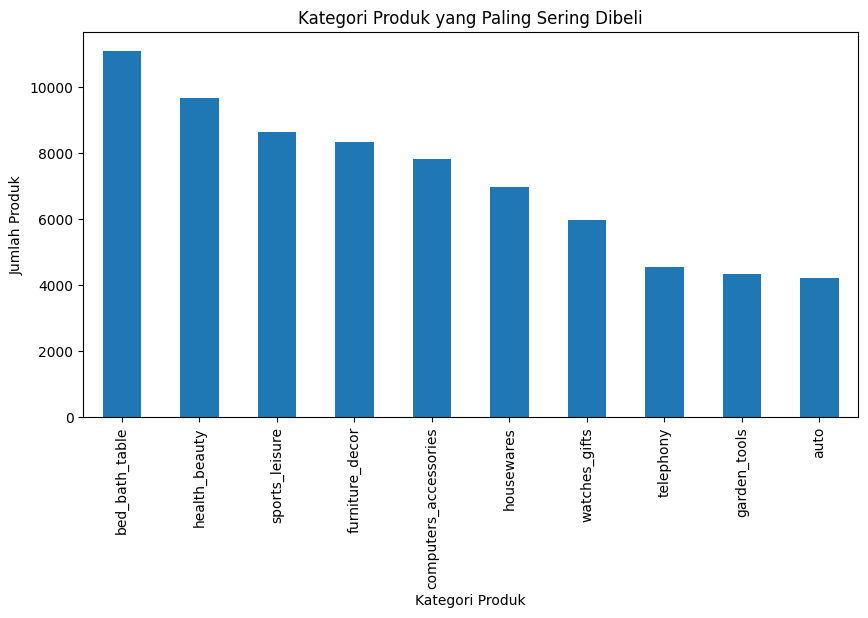

In [ ]:
df.product_category_name.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title('Kategori Produk yang Paling Sering Dibeli')
plt.ylabel('Jumlah Produk')
plt.xlabel('Kategori Produk')

Text(0.5, 0, 'Kategori Produk')

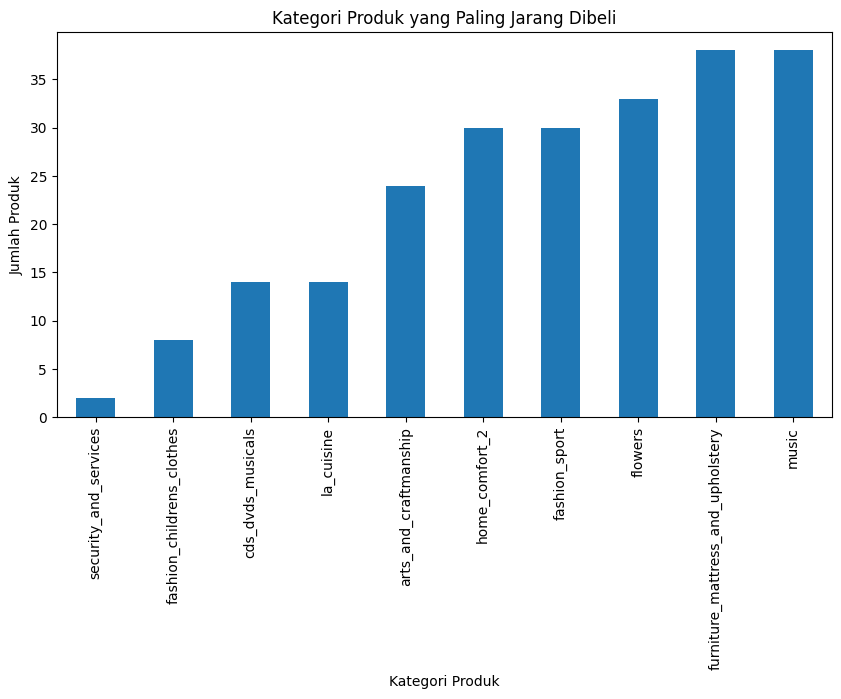

In [ ]:
df.product_category_name.value_counts().nsmallest(10).plot(kind='bar', figsize=(10,5))
plt.title('Kategori Produk yang Paling Jarang Dibeli')
plt.ylabel('Jumlah Produk')
plt.xlabel('Kategori Produk')

Customer dari kota mana yang paling sering berbelanja disini?

Text(0.5, 0, 'Kota')

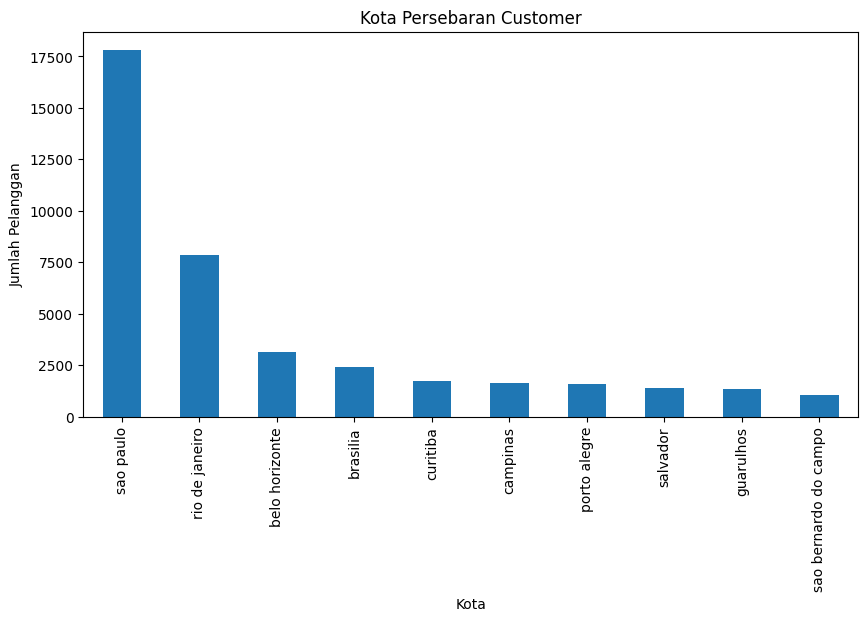

In [ ]:
df.customer_city.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title('Kota Persebaran Customer')
plt.ylabel('Jumlah Pelanggan')
plt.xlabel('Kota')

Bagaimana grafik penjualan tiap bulannya?

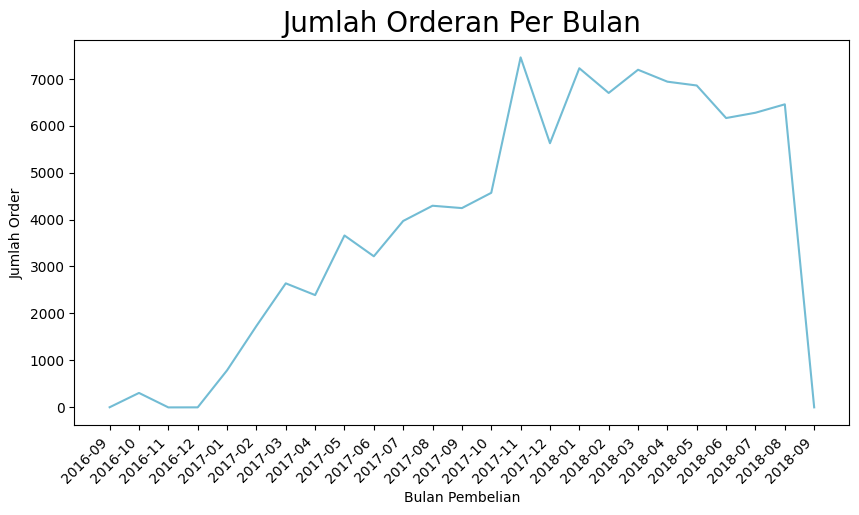

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(order_per_bulan["order_purchase_timestamp"], order_per_bulan["order_count"],  linewidth=1.5, color="#72BCD4")
plt.title("Jumlah Orderan Per Bulan", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.ylabel('Jumlah Order')
plt.xlabel('Bulan Pembelian')
plt.show()

# RFM Analysis

Analisis ini bertujuan untuk menganalisis perilaku pelanggan berdasarkan tiga kategori yaitu recency (terakhir pelanggan melakukan transaksi), frequency (seberapa sering pelanggan melakukan transaksi), dan monetary (jumlah uang yang dihabiskan pelanggan untuk melakukan pembelian)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   order_id                           112650 non-null  object        
 1   order_item_id                      112650 non-null  int64         
 2   product_id                         112650 non-null  object        
 3   seller_id                          112650 non-null  object        
 4   shipping_limit_date                112650 non-null  object        
 5   price                              112650 non-null  float64       
 6   freight_value                      112650 non-null  float64       
 7   customer_id                        112650 non-null  object        
 8   order_status                       112650 non-null  object        
 9   order_purchase_timestamp           112650 non-null  datetime64[ns]
 10  order_estimated_deli

In [ ]:
rfm = df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})
rfm

,customer_id,order_purchase_timestamp,order_id,price
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00
...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,1,78.00
98662,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,1,54.90
98663,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,1,47.90
98664,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,1,199.90


In [ ]:
rfm.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00
...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,1,78.00
98662,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,1,54.90
98663,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,1,47.90
98664,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,1,199.90


In [ ]:
rfm["max_order_timestamp"] = rfm["max_order_timestamp"].dt.date
recent_date = df["order_purchase_timestamp"].dt.date.max()
rfm["recency"] = rfm["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm.drop("max_order_timestamp", axis=1, inplace=True)
rfm.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293
1,000161a058600d5901f007fab4c27140,1,54.90,414
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552
3,0002414f95344307404f0ace7a26f1d5,1,149.90,383
4,000379cdec625522490c315e70c7a9fb,1,93.00,154


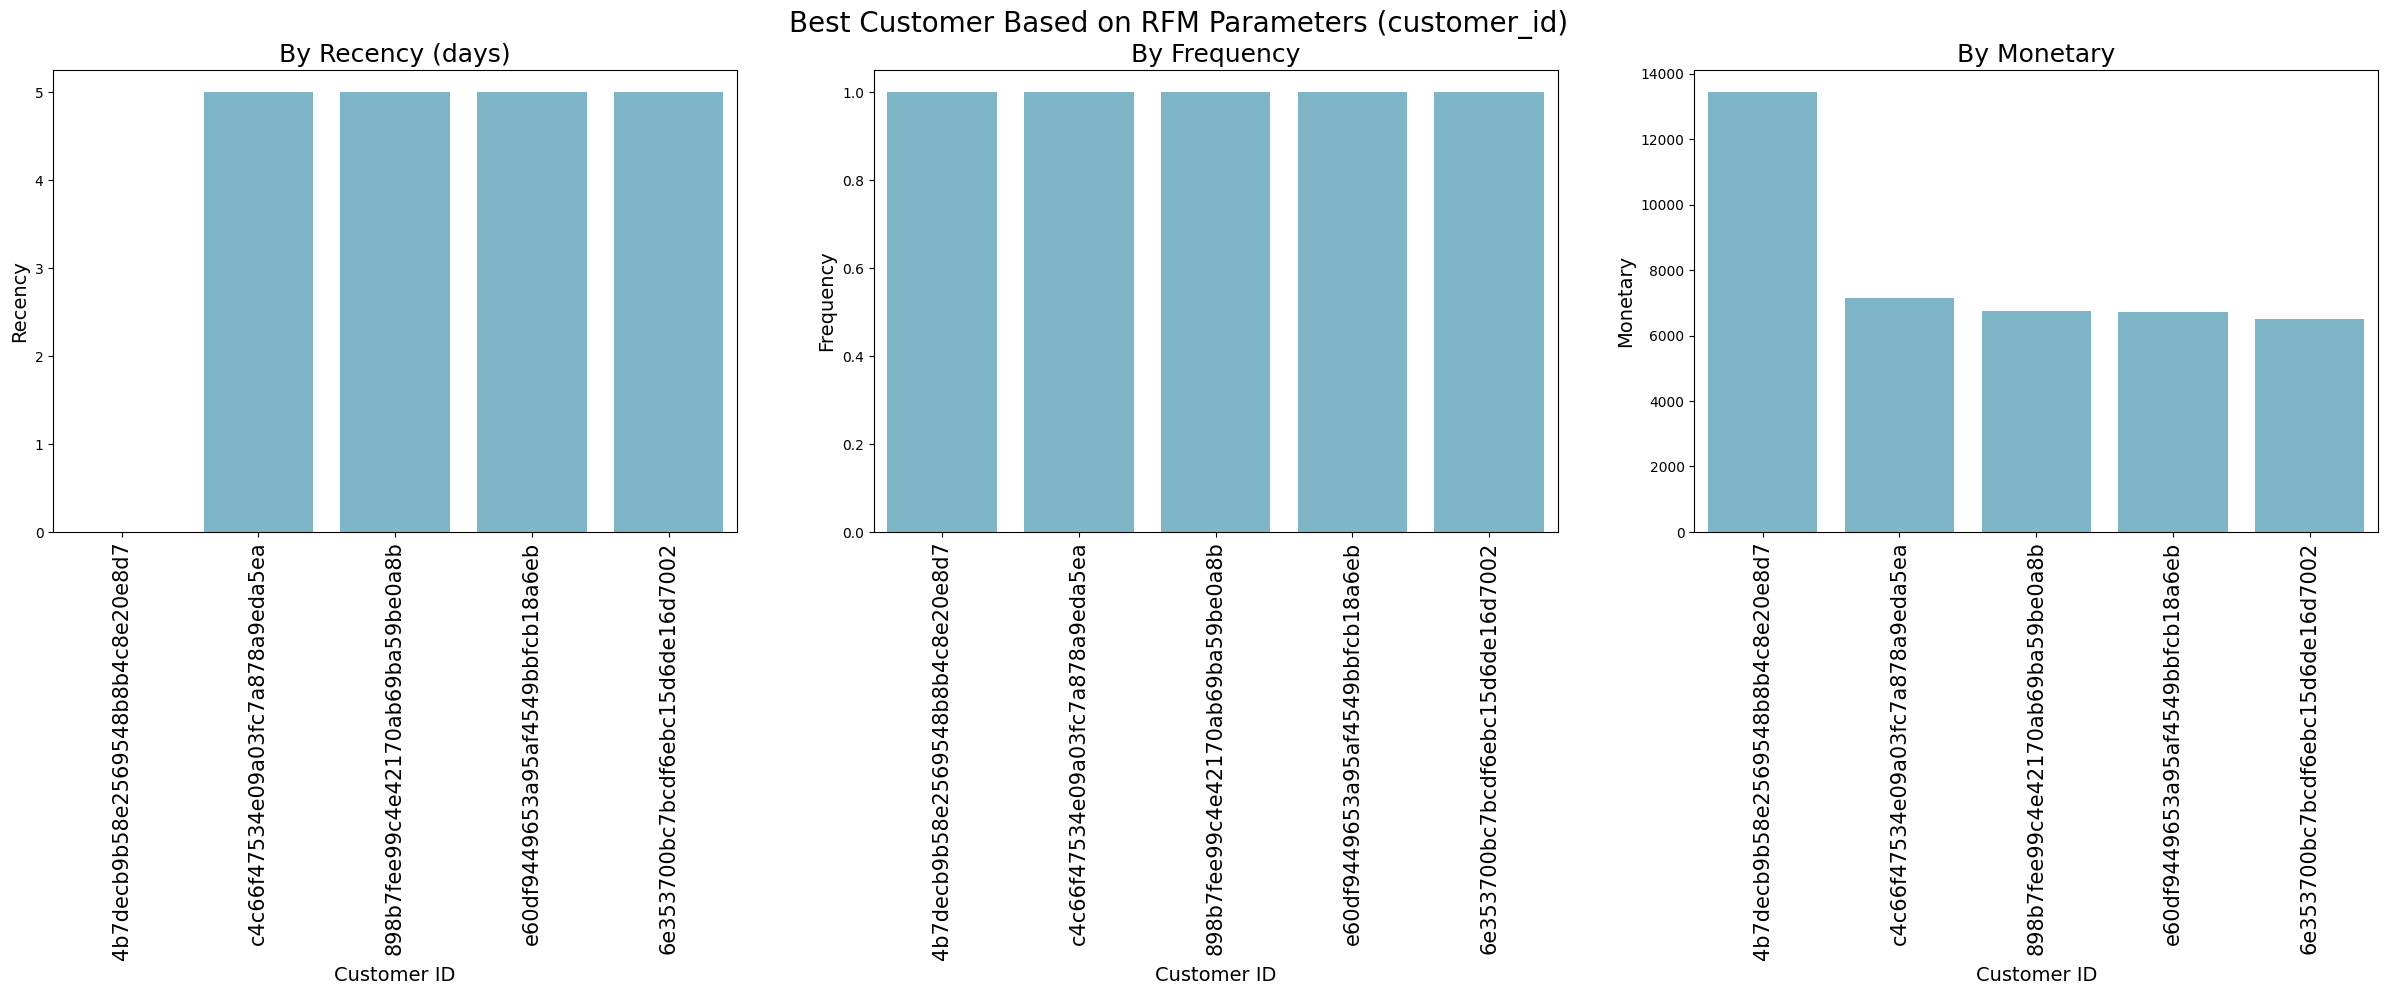

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel("Recency", fontsize=14)
ax[0].set_xlabel("Customer ID", fontsize=14)
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel("Frequency", fontsize=14)
ax[1].set_xlabel("Customer ID", fontsize=14)
ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel("Monetary", fontsize=14)
ax[2].set_xlabel("Customer ID", fontsize=14)
ax[2].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [ ]:
avg_recency = round(rfm.recency.mean(), 1)
print(f"Rata-rata transaksi terakhir pelanggan yaitu {avg_recency} hari.")
avg_frequency = round(rfm.frequency.mean(), 2)
print(f"Rata-rata pelanggan melakukan transaksi yaitu sebanyak {avg_frequency} kali.")
avg_frequency = format_currency(rfm.monetary.mean(), "BRL", locale='es_CO') #BRL karena sumber datasetnya merupakan ecommerce brazil sehingga menggunakan mata uang brazil
print(f"Rata-rata jumlah uang yang dihabiskan pelanggan untuk melakukan pembelian yaitu sebesar {avg_frequency}")

Rata-rata transaksi terakhir pelanggan yaitu 245.7 hari.
Rata-rata pelanggan melakukan transaksi yaitu sebanyak 1.0 kali.
Rata-rata jumlah uang yang dihabiskan pelanggan untuk melakukan pembelian yaitu sebesar BRL137,75


In [ ]:
df.to_csv("Hasil Analisis.csv", index=False)

# Kesimpulan

1. Kategori produk apa saja yang paling sering dibeli dan paling jarang dibeli?
**Berdasarkan grafik yang didapatkan, 5 kategori produk yang paling sering dibeli yaitu 'bed_bath_table', 'health_beauty', 'sports_leisure', 'furniture_decor', dan 'computer_accessories'. Dan 5 kategori produk yang paling jarang dibeli yaitu 'security_and_services', 'fashion_childrens_clothes', 'cds_dvds_musicals', 'la_cuisine', dan 'arts_and_craftmanship'**
2. Customer dari kota mana yang paling sering berbelanja disini?
**Berdasarkan grafik dari hasil analisis, didapat hasil bahwa customer paling banyak berasal dari kota Sao Paulo. Setelah itu, kota kedua terbanyak yaitu Rio de Janeiro**
3. Bagaimana grafik penjualan tiap bulannya?
**Grafik penjualan tiap bulannya mengalami kenaikan dan penurunan. Dapat dilihat bahwa pada bulan November 2017, jumlah orderan mencapai angka yang paling tinggi. Namun setelah itu langsung mengalami penurunan penjualan lagi.**